In [2]:
#Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import np_utils

In [4]:
#Data Importing and cleaning
df = pd.read_csv('1ex3.csv',header=0)

#X = df.drop(df.iloc[:,26:30],axis=1)
X = df.drop(columns=['DS_Fuel_Meter'])

y = df[['DS_Fuel_Meter']]
scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X)
X = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y)
y = pd.DataFrame(scaler_y)

x_train,x_test,y_train,y_test = train_test_split(X,y)
inputs = len(x_train.columns)
outputs = len(y_train.columns)

print(inputs,outputs)

72 1


In [5]:
#Building the neural network model

model = Sequential()

model.add(Dense(128,input_dim=inputs,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(outputs,activation = 'linear'))

model.compile(loss='mse',metrics=['accuracy'],optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               9344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 26,629
Trainable params: 26,629
Non-trainable params: 0
____________________________________________________

In [6]:
#Training the neural network model

history = model.fit(x_train,y_train,batch_size=256,epochs=200,verbose=2,validation_data=(x_test,y_test))
model.save('simple_trained_model.h5')

#del model #To clear RAM. Not necessary

Epoch 1/200
15/15 - 4s - loss: 0.1183 - accuracy: 2.6795e-04 - val_loss: 0.0759 - val_accuracy: 0.0000e+00
Epoch 2/200
15/15 - 0s - loss: 0.0475 - accuracy: 5.3591e-04 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 3/200
15/15 - 0s - loss: 0.0131 - accuracy: 5.3591e-04 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 4/200
15/15 - 0s - loss: 0.0066 - accuracy: 5.3591e-04 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 5/200
15/15 - 0s - loss: 0.0032 - accuracy: 5.3591e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 6/200
15/15 - 0s - loss: 0.0017 - accuracy: 5.3591e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 7/200
15/15 - 0s - loss: 0.0010 - accuracy: 5.3591e-04 - val_loss: 7.5241e-04 - val_accuracy: 0.0000e+00
Epoch 8/200
15/15 - 0s - loss: 6.4094e-04 - accuracy: 5.3591e-04 - val_loss: 5.7721e-04 - val_accuracy: 0.0000e+00
Epoch 9/200
15/15 - 0s - loss: 4.6228e-04 - accuracy: 5.3591e-04 - val_loss: 4.8712e-04 - val_accuracy: 0.0000e+00
Epoch 10/200
15/1

Epoch 73/200
15/15 - 0s - loss: 8.2603e-05 - accuracy: 5.3591e-04 - val_loss: 2.7056e-05 - val_accuracy: 0.0000e+00
Epoch 74/200
15/15 - 0s - loss: 2.0775e-05 - accuracy: 5.3591e-04 - val_loss: 2.6045e-05 - val_accuracy: 0.0000e+00
Epoch 75/200
15/15 - 0s - loss: 1.7775e-05 - accuracy: 5.3591e-04 - val_loss: 2.1948e-05 - val_accuracy: 0.0000e+00
Epoch 76/200
15/15 - 0s - loss: 1.7897e-05 - accuracy: 5.3591e-04 - val_loss: 2.7710e-05 - val_accuracy: 0.0000e+00
Epoch 77/200
15/15 - 0s - loss: 3.5026e-05 - accuracy: 5.3591e-04 - val_loss: 1.0946e-04 - val_accuracy: 0.0000e+00
Epoch 78/200
15/15 - 0s - loss: 6.7293e-05 - accuracy: 5.3591e-04 - val_loss: 2.8265e-05 - val_accuracy: 0.0000e+00
Epoch 79/200
15/15 - 0s - loss: 1.9764e-05 - accuracy: 5.3591e-04 - val_loss: 5.7939e-05 - val_accuracy: 0.0000e+00
Epoch 80/200
15/15 - 0s - loss: 3.3780e-05 - accuracy: 5.3591e-04 - val_loss: 5.8943e-05 - val_accuracy: 0.0000e+00
Epoch 81/200
15/15 - 0s - loss: 9.7087e-05 - accuracy: 5.3591e-04 - val_

Epoch 144/200
15/15 - 0s - loss: 1.9067e-05 - accuracy: 5.3591e-04 - val_loss: 1.4574e-05 - val_accuracy: 0.0000e+00
Epoch 145/200
15/15 - 0s - loss: 1.9415e-05 - accuracy: 5.3591e-04 - val_loss: 9.3318e-05 - val_accuracy: 0.0000e+00
Epoch 146/200
15/15 - 0s - loss: 6.3834e-05 - accuracy: 5.3591e-04 - val_loss: 3.4157e-05 - val_accuracy: 0.0000e+00
Epoch 147/200
15/15 - 0s - loss: 5.7453e-05 - accuracy: 5.3591e-04 - val_loss: 8.4333e-05 - val_accuracy: 0.0000e+00
Epoch 148/200
15/15 - 0s - loss: 3.8513e-05 - accuracy: 5.3591e-04 - val_loss: 1.4625e-05 - val_accuracy: 0.0000e+00
Epoch 149/200
15/15 - 0s - loss: 1.0102e-05 - accuracy: 5.3591e-04 - val_loss: 1.3530e-05 - val_accuracy: 0.0000e+00
Epoch 150/200
15/15 - 0s - loss: 1.3647e-05 - accuracy: 5.3591e-04 - val_loss: 1.2956e-05 - val_accuracy: 0.0000e+00
Epoch 151/200
15/15 - 0s - loss: 7.8646e-05 - accuracy: 5.3591e-04 - val_loss: 1.1734e-04 - val_accuracy: 0.0000e+00
Epoch 152/200
15/15 - 0s - loss: 4.0362e-05 - accuracy: 5.3591e-

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

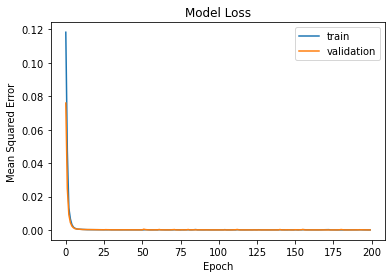

In [7]:
#Viewing a model
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['train','validation'],loc='upper right')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

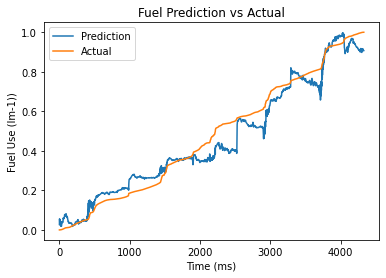

In [9]:
#Predict new data
df = pd.read_csv('1ex5.csv',header=0)

#X = df.drop(df.iloc[:,26:30],axis=1)
#y = df[['Input_Slew RealValue','Input_BoomLift RealValue','Input_DipperArm RealValue','Input_Bucket RealValue']]
X = df.drop(columns=['DS_Fuel_Meter'])

y = df[['DS_Fuel_Meter']]

scaler_X=MinMaxScaler()
scaler_X = scaler_X.fit_transform(X)
X_new = pd.DataFrame(scaler_X)
scaler_y=MinMaxScaler()
scaler_y = scaler_y.fit_transform(y)
y_new = pd.DataFrame(scaler_y)

y_predict = model.predict(X_new)

#Plot the slew 
#%matplotlib notebook
plt.plot(y_predict[:,0])
plt.plot(y_new[0])
#plt.plot(y_new[0])
plt.title('Fuel Prediction vs Actual')
plt.xlabel('Time (ms)')
plt.ylabel('Fuel Use (lm-1))')
plt.legend(['Prediction','Actual'],loc='upper left')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

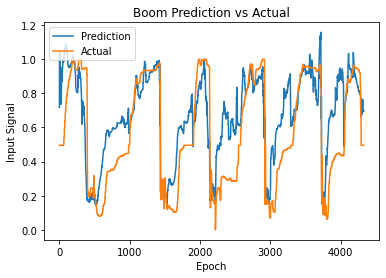

In [7]:
#Plot boom
plt.plot(y_predict[:,1])
plt.plot(y_new[1])
#plt.plot(y_new[0])
plt.title('Boom Prediction vs Actual')
plt.xlabel('Epoch')
plt.ylabel('Input Signal')
plt.legend(['Prediction','Actual'],loc='upper left')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

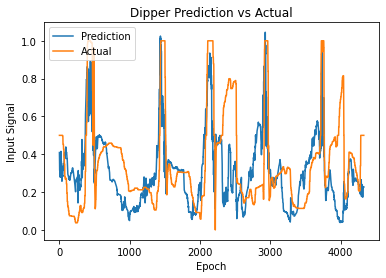

In [8]:
#Plot dipper
plt.plot(y_predict[:,2])
plt.plot(y_new[2])
#plt.plot(y_new[0])
plt.title('Dipper Prediction vs Actual')
plt.xlabel('Epoch')
plt.ylabel('Input Signal')
plt.legend(['Prediction','Actual'],loc='upper left')

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

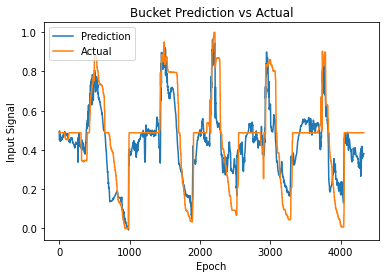

In [9]:
#Plot Bucket
plt.plot(y_predict[:,3])
plt.plot(y_new[3])
#plt.plot(y_new[0])
plt.title('Bucket Prediction vs Actual')
plt.xlabel('Epoch')
plt.ylabel('Input Signal')
plt.legend(['Prediction','Actual'],loc='upper left')

plt.show